In [26]:
#ICP_3 Assingment
#Author: Gopi Reddy Pallerla
#code language: Python
# vedio link: https://drive.google.com/file/d/19b2NNZk5UQC3bC2SefGs549XRmjsteUm/view?usp=sharing


#Question 1.
# a. reading csv data file
import pandas as pd

df = pd.read_csv('data.csv')


In [4]:
# B. Sastical description about the data

print(df.describe())


         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   164.000000
mean    63.846154  107.461538  134.047337   375.790244
std     42.299949   14.510259   16.450434   266.379919
min     15.000000   80.000000  100.000000    50.300000
25%     45.000000  100.000000  124.000000   250.925000
50%     60.000000  105.000000  131.000000   318.600000
75%     60.000000  111.000000  141.000000   387.600000
max    300.000000  159.000000  184.000000  1860.400000


In [5]:
#C. checking the data of null values

print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [7]:
# D. Replacing with mean

df.fillna(df.mean(), inplace=True)

In [9]:
# E. selecting 2 columns and aggregating data using min, max, count, mean
# selecting 'Pulse' and 'Maxpulse' with actual column names
agg_df = df[['Pulse', 'Maxpulse']].agg(['min', 'max', 'count', 'mean'])
print(agg_df)

            Pulse    Maxpulse
min     80.000000  100.000000
max    159.000000  184.000000
count  169.000000  169.000000
mean   107.461538  134.047337


In [10]:
# F.Filter the dataframe to select the rows with calories values between 500 and 1000.
filtered_df = df[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]
print(filtered_df)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [11]:
#G. Filter the dataframe to select the rows with calories values > 500 and pulse < 100

filtered_df2 = df[(df['Calories'] > 500) & (df['Pulse'] < 100)]
print(filtered_df2)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [12]:
# H. Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”

df_modified = df.drop('Maxpulse', axis=1)
print(df_modified)


     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [13]:
# I. Delete the “Maxpulse” column from the main df dataframe

df.drop('Maxpulse', axis=1, inplace=True)


In [14]:
# J.Convert the datatype of Calories column to int datatype.

df['Calories'] = df['Calories'].astype(int)


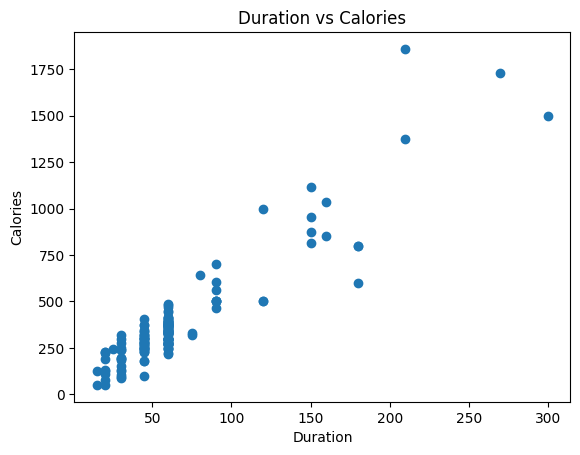

In [15]:
# K. Using pandas create a scatter plot for the two columns (Duration and Calories).

import matplotlib.pyplot as plt

plt.scatter(df['Duration'], df['Calories'])
plt.xlabel('Duration')
plt.ylabel('Calories')
plt.title('Duration vs Calories')
plt.show()


In [ ]:
#Question 2.
#Linear Regression
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [18]:
# A. Loading  the CSV file into a pandas DataFrame
df = pd.read_csv('Salary_Data.csv')

# Checking the first few rows of the data by printning salary
print(df.head())

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


In [20]:
# B. Split the data in train_test partitions, such that 1/3 of the data is reserved as test subset
# Split the data into features (X) and target (y)

#Importing required library
from sklearn.model_selection import train_test_split # Importing the train_test_split function
X = df[['YearsExperience']]  # Features (independent variable)
y = df['Salary']             # Target (dependent variable)

# Split into training and testing data (1/3 test, 2/3 train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Display the sizes of the splits
print(f'Training set size: {len(X_train)}')
print(f'Testing set size: {len(X_test)}')


Training set size: 20
Testing set size: 10


In [22]:
#C.  Train and predict the model

# Importing the LinearRegression class from sklearn.linear_model
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display the predicted salaries for the test set
print(y_pred)


[115814.30756236  71511.92534771 102617.85328566  75282.34085534
  55487.65944028  60200.67882482 122412.53470072 107330.8726702
  63028.49045554  35692.97802523]


In [24]:
#D. Calculate the mean_squared error

# Importing the required library
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 35301898.887134895


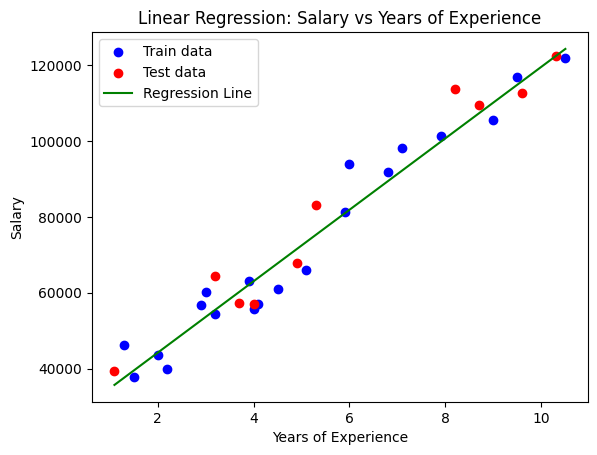

In [25]:
#E. Visualize both train and test data using scatter plot.

# Scatter plot of training data
plt.scatter(X_train, y_train, color='blue', label='Train data')

# Scatter plot of testing data
plt.scatter(X_test, y_test, color='red', label='Test data')

# Plot the regression line (for visualization, use the full data set)
plt.plot(X, model.predict(X), color='green', label='Regression Line')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs Years of Experience')

# Show the plot with a legend
plt.legend()
plt.show()
